In [53]:
import sys 
!{sys.executable} -m pip install seaborn

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()

In [55]:
videogame_sales = pd.read_csv('top100videogamesales.csv')
videogame_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros.,Nintendo,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,5,Wii Play,Nintendo,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


In [56]:
videogame_sales.dtypes
videogame_sales.groupby('Publisher').size()

Publisher
505 Games                       1
Activision                     16
Bethesda Softworks              3
Electronic Arts                12
Microsoft Game Studios          7
Nintendo                       40
Sega                            1
Sony Computer Entertainment     6
Take-Two Interactive           10
Ubisoft                         4
dtype: int64

In [57]:
videogame_sales.Publisher.unique().size #10 unique publishers 

10

In [267]:
publisher_regional_sales = videogame_sales.loc[:, ['Publisher','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
publisher_NA_Sales = publisher_regional_sales.groupby('Publisher')['NA_Sales'].sum().reset_index()
publisher_EU_Sales = publisher_regional_sales.groupby('Publisher')['EU_Sales'].sum().reset_index()
publisher_JP_Sales = publisher_regional_sales.groupby('Publisher')['JP_Sales'].sum().reset_index()
publisher_other_Sales = publisher_regional_sales.groupby('Publisher')['Other_Sales'].sum().reset_index()
df_list = [publisher_NA_Sales, publisher_EU_Sales, publisher_JP_Sales, publisher_other_Sales]
sum_list = pd.concat([df.set_index('Publisher') for df in df_list], axis=1, join='inner').reset_index()
sum_list = sum_list.sort_values(by=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], ascending=False)
sum_list

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
5,Nintendo,273.32,204.49,122.35,53.03
1,Activision,94.67,59.91,3.72,21.64
8,Take-Two Interactive,62.48,43.09,3.56,26.62
4,Microsoft Game Studios,53.15,18.39,0.62,5.88
3,Electronic Arts,24.71,47.41,1.38,14.72
7,Sony Computer Entertainment,21.77,17.10,6.91,13.20
9,Ubisoft,19.54,11.28,0.01,3.14
2,Bethesda Softworks,10.05,8.72,0.59,3.00
0,505 Games,3.50,2.64,0.00,0.67
6,Sega,2.58,3.90,0.66,0.91


## QUESTION 1: 

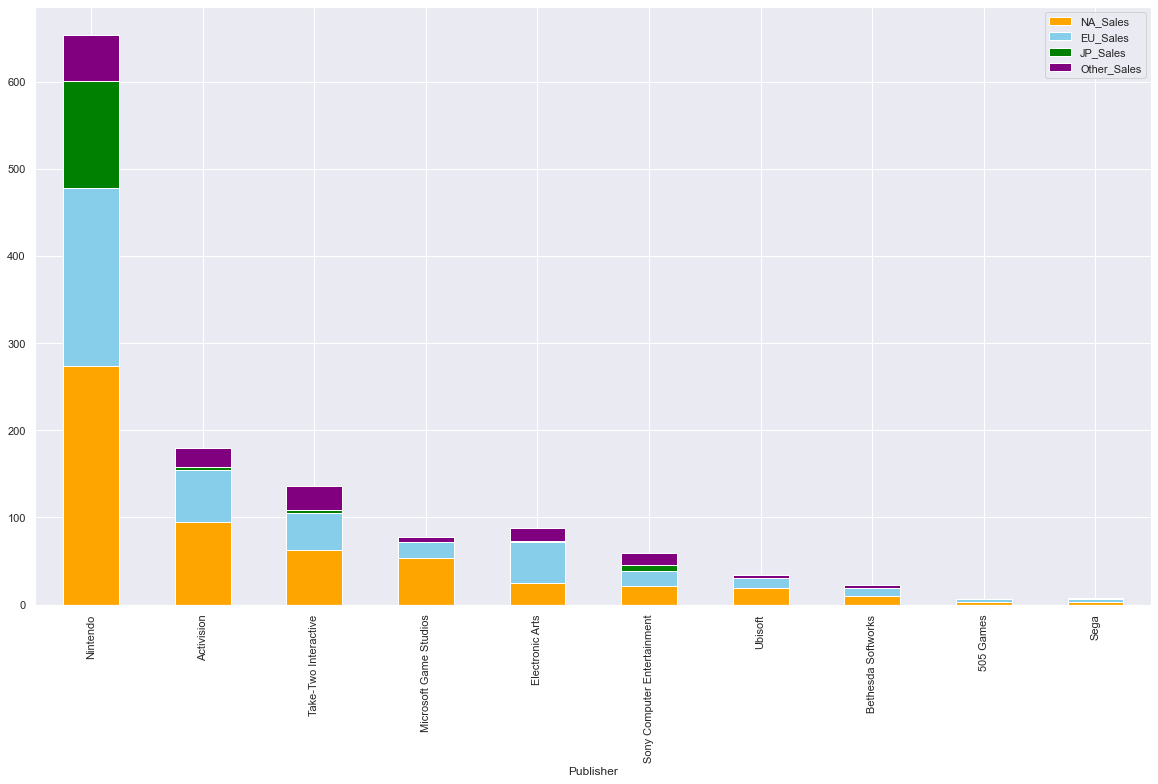

In [268]:
sum_list.plot(kind='bar', x='Publisher', stacked=True, color=['orange', 'skyblue', 'green', 'purple'])
sns.set(rc={'figure.figsize':(20,11)}) #https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot

### Regional Sales by Publisher

The stacked bar graph above shows the sales, by region, for each publisher. Nintendo very clearly has the highest sales according to this data set, leading the group in all sales regions.

## QUESTION 2: 

In [72]:
total_global_sales = videogame_sales.groupby('Year').sum()
total_global_sales

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,
2001,201,21.16,12.71,6.29,3.01,43.20
2002,124,17.40,12.14,6.02,3.27,38.83
2003,166,7.39,4.60,0.95,1.21,14.15
2004,294,31.39,10.72,6.04,20.60,68.77
2005,248,34.19,42.32,22.71,11.15,110.36
2006,102,77.15,54.16,19.84,16.28,167.44
2007,420,42.93,27.02,9.56,8.40,87.92
2008,355,45.88,27.95,9.78,8.86,92.42
2009,366,65.10,48.45,15.14,13.14,141.83


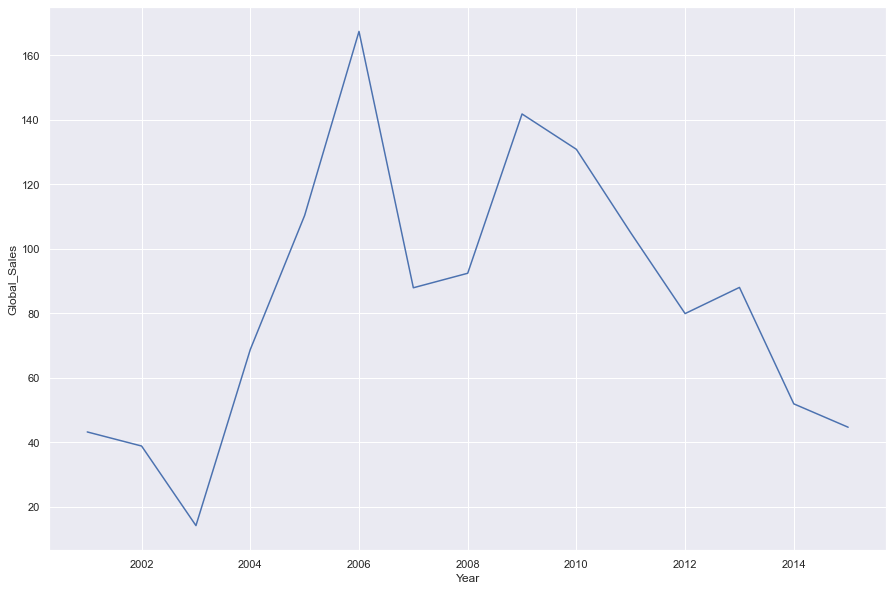

In [76]:
sns.lineplot(data=total_global_sales, x='Year', y='Global_Sales')
sns.set(rc={'figure.figsize':(15,10)})

### Total global sales

The line chart above shows the sum of global sales by year between 2001 and 2015. The year with the lowest global sales was 2003, with around 14 total units of sale. The highest year was 2006, with around 167 units of sale. 

## QUESTION 3: 

In [260]:
videogame_sales.head()
action = videogame_sales[videogame_sales.Genre == 'Action']
action.Name.unique().size #12 unique action games 
action_distribution = action.groupby('Name')['Global_Sales'].sum().reset_index().sort_values(by='Global_Sales', ascending=False)
action_distribution

,Name,Global_Sales
3,Grand Theft Auto V,49.76
2,Grand Theft Auto IV,21.59
5,Grand Theft Auto: San Andreas,20.81
6,Grand Theft Auto: Vice City,16.15
1,Grand Theft Auto III,13.10
7,Pokemon HeartGold/Pokemon SoulSilver,11.90
0,FIFA Soccer 13,8.24
4,Grand Theft Auto: Liberty City Stories,7.72
9,The Legend of Zelda: Twilight Princess,7.31
11,Uncharted 3: Drake's Deception,6.83


<AxesSubplot:xlabel='Global_Sales', ylabel='Name'>

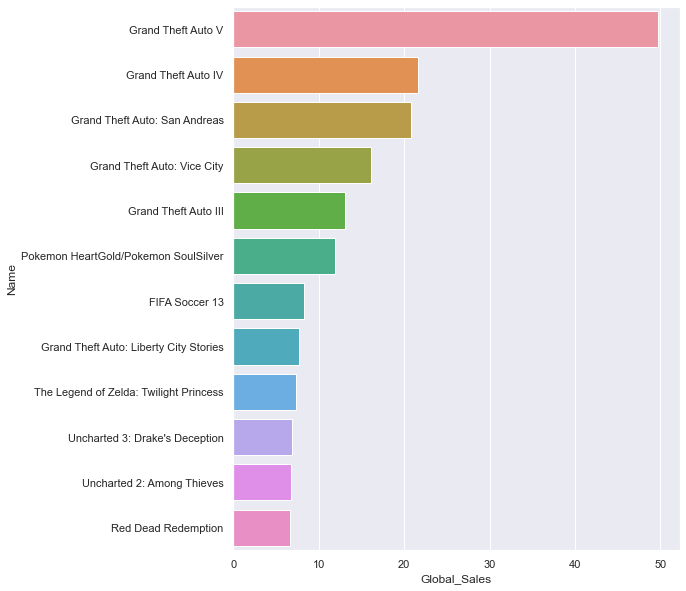

In [77]:
fig, ax = plt.subplots(figsize=(8, 10))
sns.barplot(data=action_distribution, x=action_distribution.Global_Sales, y=action_distribution.Name, ax=ax)



### Global Sales Distribution for Action Games 

The best way to illustrate the global sales of action video games is through a horizontally-orients histogram. Looking at the chart, **Grand Theft Auto V** is the clear best-selling game in the genre, with nearly 50 units sold world-wide. Interesting to note, the Grand Theft Auto games took the top 5 spots in the category. 

## QUESTION 4: 

In [85]:
videogame_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros.,Nintendo,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,5,Wii Play,Nintendo,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


In [244]:
videogame_sales.head()
all_NA_sales = videogame_sales.loc[:, ['Genre', 'NA_Sales']]
NA_Sales_by_Genre = all_NA_sales.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False)

In [245]:
NA_Sales_by_Genre # After looking at this, decision to set other criteria in NA dataset to <50 

Genre
Shooter         140.44
Sports           84.87
Action           77.81
Misc             70.60
Racing           56.45
Platform         52.67
Role-Playing     50.48
Simulation       14.61
Fighting         14.40
Puzzle            3.44
Name: NA_Sales, dtype: float64

In [247]:
type(NA_Sales_by_Genre)  
for genre, sales in NA_Sales_by_Genre.items(): #Group sales under 50 into an "other" category
    if sales < 50:
        NA_Sales_by_Genre.rename({genre: 'Other'}, inplace=True)

NA_Sales_by_Genre = NA_Sales_by_Genre.groupby('Genre').sum()


<AxesSubplot:ylabel='NA_Sales'>

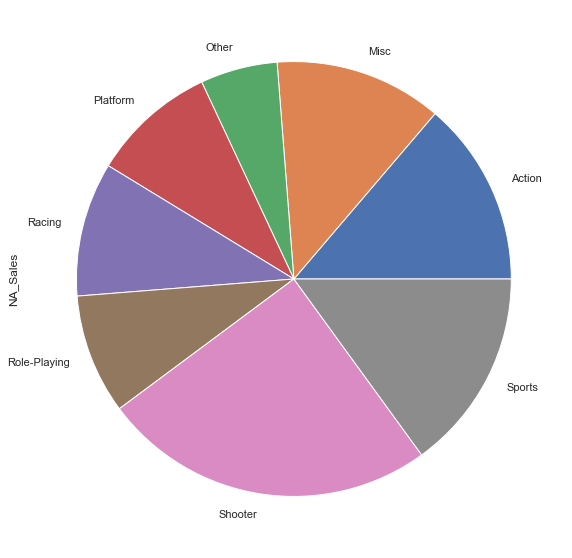

In [237]:
NA_Sales_by_Genre.plot.pie(y='NA_Sales')

### North American Sales by Genre

The pie chart for NA sales by genre shows that shooting games largely outsold the other video game genres. When I grouped the NA sales list by genre, I saw a noticeable drop off in sales for the bottom three categories (Simulation, Fighting and Puzzle, respectively). I accordingly set the criteria for the "other" category at categories where sales were < 50 units. 

## QUESTION 5: 

In [241]:
all_EU_sales = videogame_sales.loc[:, ['Genre', 'EU_Sales']]
EU_Sales_by_Genre = all_EU_sales.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False)

In [246]:
EU_Sales_by_Genre #After seeing the EU sales numbers, the decision is to set 'other' category to <30. The bottom 3 categories are the same as NA

Genre
Sports          82.18
Shooter         81.63
Action          58.15
Misc            48.00
Racing          44.03
Role-Playing    36.20
Platform        33.12
Simulation      23.26
Puzzle           5.36
Fighting         5.00
Name: EU_Sales, dtype: float64

In [249]:
for genre, sales in EU_Sales_by_Genre.items(): #Group sales under 30 into an "other" category
    if sales < 30:
        EU_Sales_by_Genre.rename({genre: 'Other'}, inplace=True)

EU_Sales_by_Genre = EU_Sales_by_Genre.groupby('Genre').sum()

<AxesSubplot:ylabel='EU_Sales'>

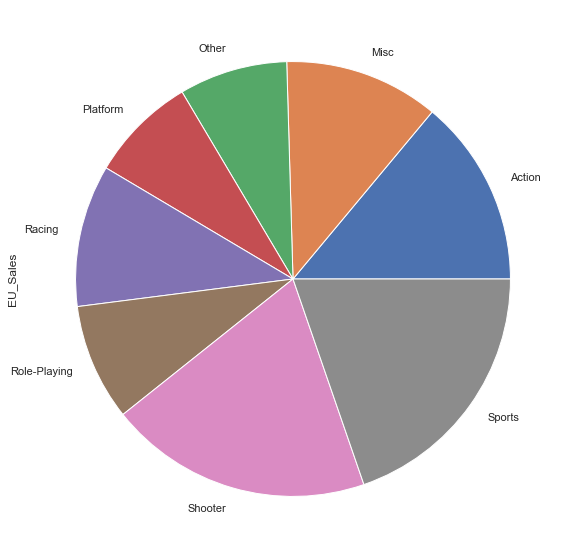

In [251]:
EU_Sales_by_Genre.plot.pie(y='EU_Sales')

### EU Sales by Genre 

The pie chart for EU sales by genre shows two genres competing for the top spot, with sports games selling marginally more units than shooter games. Similar to the NA sales data, the bottom three categories were Simulation, Fighting and Puzzle. I set the "other" category criteria to genres with < 30 units sold to encompass these bottom three genres (presenting the same number of genres as the NA pie chart).

## QUESTION 6: Comparing NA and EU sales by genre

NA sales by genre show a much larger tendency toward shooter games than EU sales. While shooters were still very popular in EU, the number of units sold in NA is significantly higher. Aside from the large difference in shooter game sales, the distribution of the other genres seems to be fairly similar. 

## QUESTION 7:  

<AxesSubplot:title={'center':'Video Game Sales by Platform'}, ylabel='Platform'>

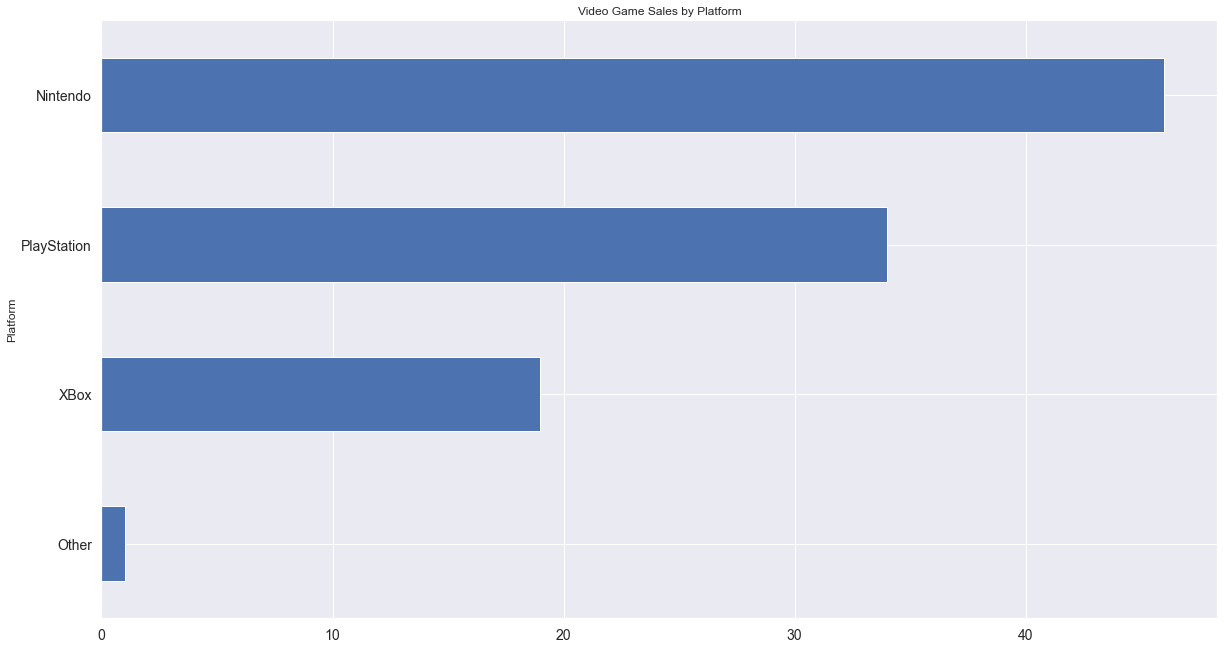

In [278]:
sales_by_platform = videogame_sales.groupby('Platform').size().sort_values(ascending=True)
sales_by_platform.plot(kind='barh',x='Platform', title='Video Game Sales by Platform', fontsize=14)

In [279]:
sales_by_platform

Platform
Other           1
XBox           19
PlayStation    34
Nintendo       46
dtype: int64

### Count of Games by Platform

The bar chart above shows the number of games created for each platform. The leading platform is nintendo with 46 games created, followed by Playstation (34), XBox (19) and Other (1). 